<a href="https://colab.research.google.com/github/jerryadi29/Machine-learning_mini-projects/blob/main/Copy_of_OLA(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime 
import pytz
import calendar
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use('classic')
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
df_train_inde=pd.read_csv('/content/train.csv',)
df_train_dep=pd.read_csv('/content/train_label.csv',header=0,names=['Total_booking'])
df_test_inde=pd.read_csv('/content/test.csv',date_parser='datetime')
df_test_dep=pd.read_csv('/content/test_label.csv',header=0,names=['Total_booking'])

In [4]:
df_train=pd.concat([df_train_inde,df_train_dep],axis=1)
df_train.reset_index()
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5.0
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,139.0
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,209.0
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,184.0
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,791.0


In [5]:
df_test=pd.concat([df_test_inde,df_test_dep],axis=1)
df_test.reset_index()
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,87.0
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,11.0
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,84.0
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,668.0
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,53.0


In [6]:
df_train_copy=df_train.copy()
Time=df_train_copy.datetime.str.split(pat=' ',expand=True)[1]
Date=df_train_copy.datetime.str.split(pat=' ',expand=True)[0]
calendar.Calendar()
df_train_copy=df_train_copy.drop(['datetime'],axis=1)
df_train_copy_new=pd.concat([df_train_copy,Date,Time],axis=1)
df_train_copy_new.rename(columns={0:'date',1:"time"}, inplace = True)
df_train_copy_new['days']=df_train_copy_new.date.apply(lambda x: calendar.day_name[datetime.datetime.strptime(x,"%m/%d/%Y").weekday()])
df_train_copy_new['month']=df_train_copy_new.date.apply(lambda x: calendar.month_name[datetime.datetime.strptime(x,"%m/%d/%Y").month])
df_train_copy_new.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,time,days,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5.0,5/2/2012,19:00,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,139.0,9/5/2012,4:00,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,209.0,1/13/2011,9:00,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,184.0,11/18/2011,16:00,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,791.0,9/13/2011,13:00,Tuesday,September
5,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,395.0,8/17/2012,17:00,Friday,August
6,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,5.0,10/6/2012,9:00,Saturday,October
7,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,9.0,9/10/2012,4:00,Monday,September
8,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,78.0,7/14/2012,4:00,Saturday,July
9,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,129.0,2/6/2011,18:00,Sunday,February


In [7]:
df_test_copy=df_test.copy()
Time=df_test_copy.datetime.str.split(pat=' ',expand=True)[1]
Date=df_test_copy.datetime.str.split(pat=' ',expand=True)[0]
calendar.Calendar()
df_test_copy=df_test_copy.drop(['datetime'],axis=1)
df_test_copy=pd.concat([df_test_copy,Date,Time],axis=1)
df_test_copy.rename(columns={0:'date',1:"time"}, inplace = True)
df_test_copy['days']=df_test_copy.date.apply(lambda x: calendar.day_name[datetime.datetime.strptime(x,"%m/%d/%Y").weekday()])
df_test_copy['month']=df_test_copy.date.apply(lambda x: calendar.month_name[datetime.datetime.strptime(x,"%m/%d/%Y").month])
df_test_copy.shape

(2178, 13)

**VISUALIZATION OF THE DATA**

*Highest Total Booking for everymonth w.r.t Days*

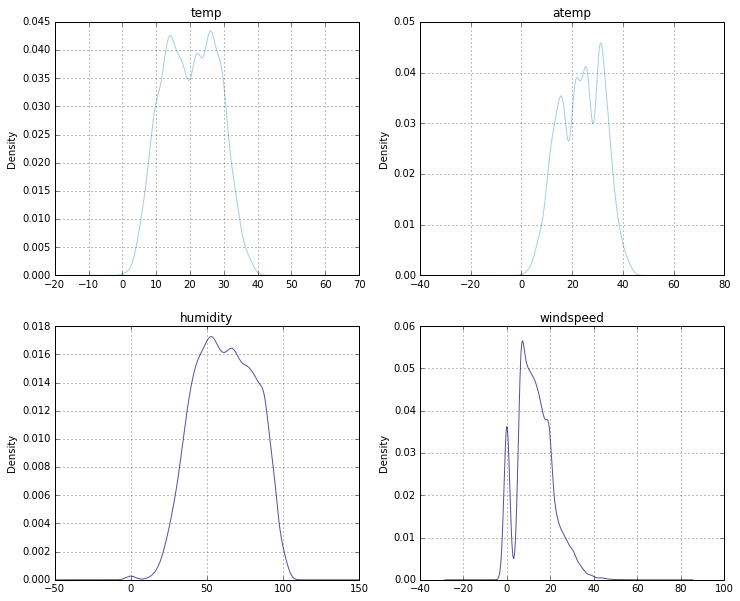

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,10))

df_train_copy_new['temp'].plot(kind='kde',ax=axes[0,0],colormap='Paired',title='temp',grid=True)
df_train_copy_new['atemp'].plot(kind='kde',ax=axes[0,1],colormap='Paired',title='atemp',grid=True)
df_train_copy_new['humidity'].plot(kind='kde',ax=axes[1,0],colormap='Spectral_r',title='humidity',grid=True)
df_train_copy_new['windspeed'].plot(kind='kde',ax=axes[1,1],colormap='Spectral_r',title='windspeed',grid=True)


plt.show() 

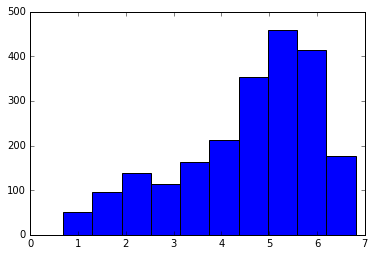

In [9]:
df_train_copy_new['Total_booking']=np.log1p(df_train_copy_new['Total_booking'])

df_test_copy['Total_booking']=np.log1p(df_test_copy.Total_booking)

plt.hist(df_test_copy['Total_booking'],bins=10)
plt.show()

In [10]:
df_train_copy_new.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,time,days,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,1.791759,5/2/2012,19:00,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,4.941642,9/5/2012,4:00,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,5.347108,1/13/2011,9:00,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,5.220356,11/18/2011,16:00,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,6.674561,9/13/2011,13:00,Tuesday,September


In [11]:
print(df_train_copy_new.windspeed.median())
print(df_train_copy_new.windspeed.mean())
print(df_train_copy_new.windspeed.mode())
print(df_train_copy_new.windspeed.max())
print(df_train_copy_new.windspeed.min())

12.998
12.843890767110922
0    0.0
dtype: float64
56.9969
0.0


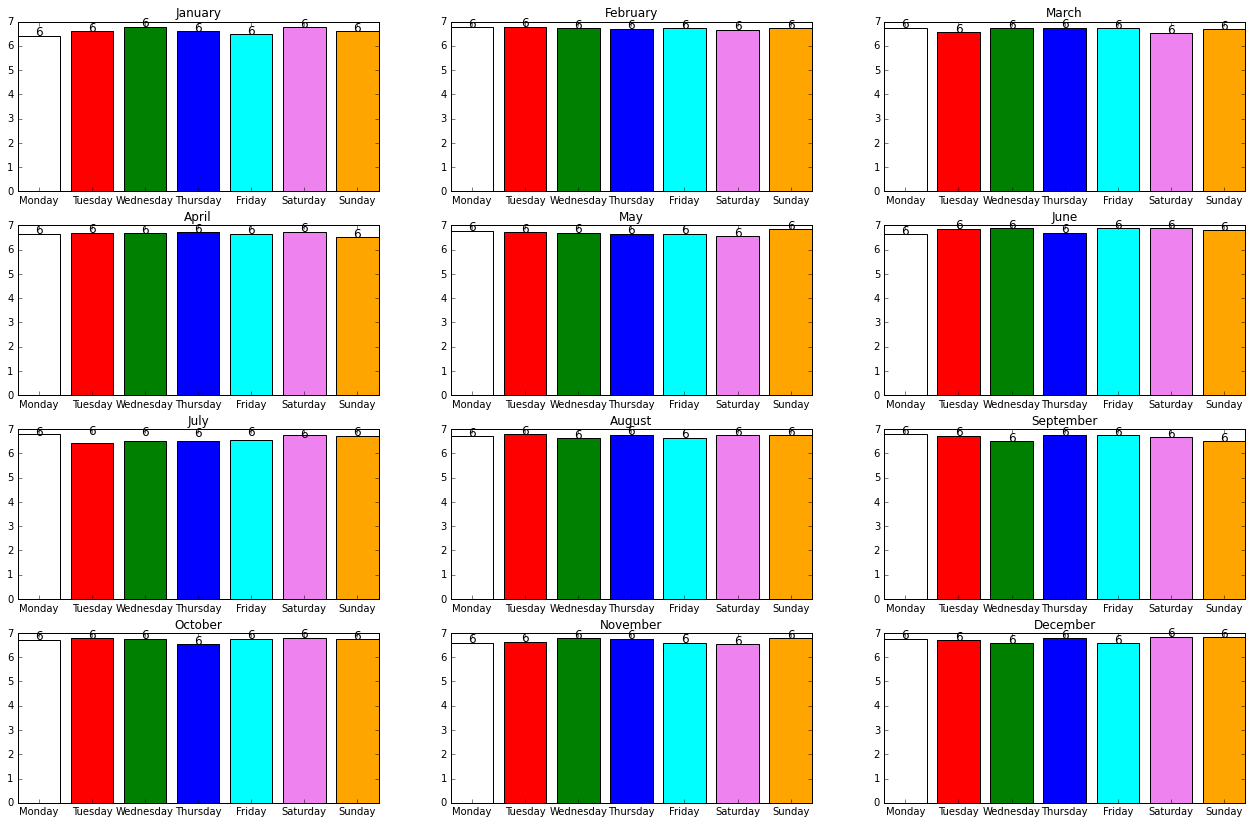

In [12]:
group_max=pd.pivot_table(df_train_copy_new, values='Total_booking',index=['days'],columns=['month'],aggfunc=np.max)
group_mean=pd.pivot_table(df_train_copy_new, values='Total_booking',index=['days'],columns=['month'],aggfunc=np.mean)
group_min=pd.pivot_table(df_train_copy_new, values='Total_booking',index=['days'],columns=['month'],aggfunc=np.min)
def bar_plot(group_max):
 
  month_value={}
  for Month in group_max.columns:
    Y=[y for y in group_max[Month]]
    month_value.update({Month:Y})
  fi,a =  plt.subplots(4,3,figsize=(22,14))

  a[0][0].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('January'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[0][0].set_title('January')
  for index,values in enumerate(list(group_max['January'])):
    a[0][0].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[0][1].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('February'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[0][1].set_title('February')
  for index,values in enumerate(list(group_max['February'])):
    a[0][1].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[0][2].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('March'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[0][2].set_title('March')
  for index,values in enumerate(list(group_max['March'])):
    a[0][2].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[1][0].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('April'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[1][0].set_title('April')
  for index,values in enumerate(list(group_max['April'])):
    a[1][0].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[1][1].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('May'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[1][1].set_title('May')
  for index,values in enumerate(list(group_max['May'])):
    a[1][1].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[1][2].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('June'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[1][2].set_title('June')
  for index,values in enumerate(list(group_max['June'])):
    a[1][2].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[2][0].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('July'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[2][0].set_title('July')
  for index,values in enumerate(list(group_max['February'])):
    a[2][0].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[2][1].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get("August"),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[2][1].set_title("August")
  for index,values in enumerate(list(group_max['August'])):
    a[2][1].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[2][2].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('September'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[2][2].set_title('September')
  for index,values in enumerate(list(group_max['September'])):
    a[2][2].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[3][0].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('October'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[3][0].set_title('October')
  for index,values in enumerate(list(group_max['October'])):
    a[3][0].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[3][1].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('November'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[3][1].set_title('November')
  for index,values in enumerate(list(group_max['November'])):
    a[3][1].text(index,values,int(values),fontsize=12,horizontalalignment='center')
  a[3][2].bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],month_value.get('December'),color=['white', 'red', 'green', 'blue', 'cyan','violet','orange'])
  a[3][2].set_title('December') 
  for index,values in enumerate(list(group_max['December'])):
    a[3][2].text(index,values,int(values),fontsize=12, horizontalalignment='center')


bar_plot(group_max)


**NULL ANALYSIS**

**TRAIN DATA**

In [13]:
print("Null values in each columns ")
print(df_train_copy_new.isnull().sum())

Null values in each columns 
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    1
date             0
time             0
days             0
month            0
dtype: int64


In [14]:
print('After removing the null values')
df_train_copy_new.Total_booking=df_train_copy_new['Total_booking'].fillna(df_train_copy_new['Total_booking'].mean(),axis=0)
print(df_train_copy_new.isnull().sum())

After removing the null values
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
time             0
days             0
month            0
dtype: int64


**TEST DATA**

In [15]:
df_test_copy=df_test_copy.fillna(np.mean(df_test_copy.Total_booking),axis=0)
print(df_test_copy.isnull().sum())

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
time             0
days             0
month            0
dtype: int64


In [16]:
df_train_copy_new.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,4.603234
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,1.416114
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,0.693147
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,3.784190
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,5.003946
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,5.659482
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,6.885510


In [17]:
df_train_copy_new.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,time,days,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,1.791759,5/2/2012,19:00,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,4.941642,9/5/2012,4:00,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,5.347108,1/13/2011,9:00,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,5.220356,11/18/2011,16:00,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,6.674561,9/13/2011,13:00,Tuesday,September


**OUTLIER ANALYSIS**

*Z-SCORE*

**TRAIN DATA**

length of outlier for temp :0
length of outlier for atemp :0
length of outlier for humidity :0
length of outlier for windspeed :182
length of outlier for Total_booking :82


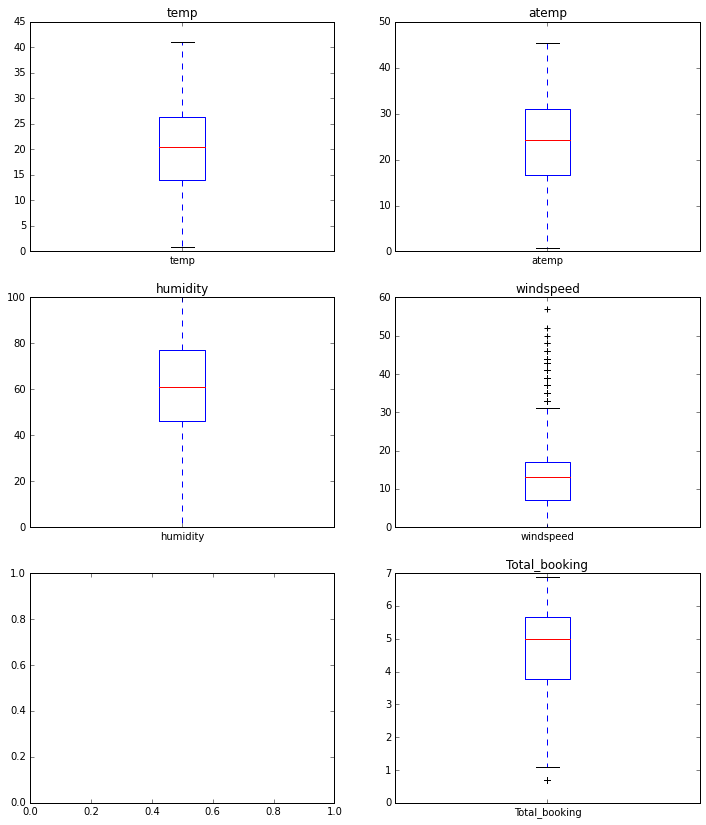

In [18]:
def outliers(df,variable):
  index_outlier=[]
  q3=df[variable].quantile(q=0.75)
  q1=df[variable].quantile(q=0.25)
  iqr=q3-q1
  lowest_value=q1-1.5*iqr
  upper_value=q3+1.5*iqr

  for i in df[variable].iteritems():
    if ( ( i[1]<lowest_value ) | ( i[1]>upper_value ) ):
      index_outlier.append(i[0])
  return index_outlier
print('length of outlier for temp :{}'.format(len(outliers(df_train_copy_new,'temp')),outliers(df_train_copy_new,'temp')))
print('length of outlier for atemp :{}'.format(len(outliers(df_train_copy_new,'atemp')),outliers(df_train_copy_new,'atemp')))
print('length of outlier for humidity :{}'.format(len(outliers(df_train_copy_new,'humidity')),outliers(df_train_copy_new,'humidity')))
print('length of outlier for windspeed :{}'.format(len(outliers(df_train_copy_new,'windspeed')),outliers(df_train_copy_new,'windspeed')))
print('length of outlier for Total_booking :{}'.format(len(outliers(df_train_copy_new,'Total_booking')),outliers(df_train_copy_new,'Total_booking')))
fig,ax=plt.subplots(3,2,figsize=(12,14))
df_train_copy_new['temp'].plot(kind='box',ax=ax[0,0],title='temp')
df_train_copy_new['atemp'].plot(kind='box',ax=ax[0,1],title='atemp')
df_train_copy_new['humidity'].plot(kind='box',ax=ax[1,0],title='humidity')
df_train_copy_new['windspeed'].plot(kind='box',ax=ax[1,1],title='windspeed')
df_train_copy_new['Total_booking'].plot(kind='box',ax=ax[2,1],title='Total_booking')


In [19]:
x=outliers(df_train_copy_new,'windspeed')+outliers(df_train_copy_new,'humidity')+outliers(df_train_copy_new,'Total_booking')

new_train_dropped=df_train_copy_new.drop(index=x,axis=0)
def outliers_booking(df,variable):
  index_outlier=[]
  q3=df[variable].quantile(q=0.75)
  q1=df[variable].quantile(q=0.25)
  iqr=q3-q1
  lowest_value=q1-1.7*iqr
  upper_value=q3+1.7*iqr

  for i in df[variable].iteritems():
    if ( ( i[1]<lowest_value ) | ( i[1]>upper_value ) ):
      index_outlier.append(i[0])
  return index_outlier
print('after removing length of outlier for temp :{}'.format(len(outliers(new_train_dropped,'temp')),outliers(new_train_dropped,'temp')))
print('after removing length of outlier for atemp :{}'.format(len(outliers(new_train_dropped,'atemp')),outliers(new_train_dropped,'atemp')))
print('after removing length of outlier for humidity :{}'.format(len(outliers(new_train_dropped,'humidity')),outliers(new_train_dropped,'humidity')))
print('after removing length of outlier for windspeed :{}'.format(len(outliers(new_train_dropped,'windspeed')),outliers(new_train_dropped,'windspeed')))
print('after removing length of outlier for Total_booking :{}'.format(len(outliers_booking(new_train_dropped,'Total_booking')),outliers_booking(new_train_dropped,'Total_booking')))
print('before removing outlier shape: ',df_train_copy_new.shape)
print('after removing outlier shape: ',new_train_dropped.shape)

after removing length of outlier for temp :0
after removing length of outlier for atemp :0
after removing length of outlier for humidity :17
after removing length of outlier for windspeed :0
after removing length of outlier for Total_booking :0
before removing outlier shape:  (8708, 13)
after removing outlier shape:  (8445, 13)


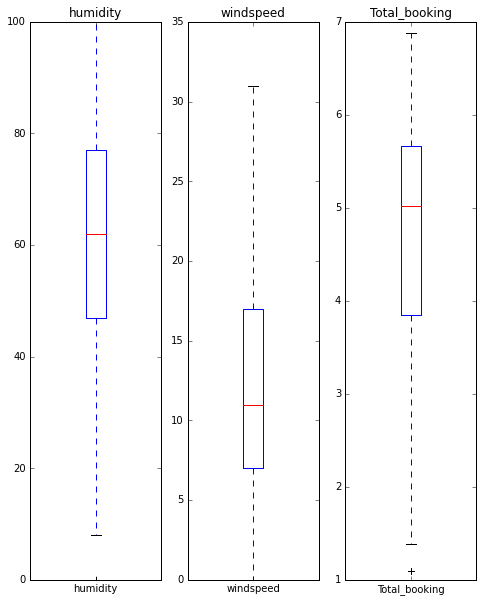

In [20]:
fig,ax=plt.subplots(1,3,figsize=(8,10))
new_train_dropped['humidity'].plot(kind='box',ax=ax[0],title='humidity')
new_train_dropped['windspeed'].plot(kind='box',ax=ax[1],title='windspeed')
new_train_dropped['Total_booking'].plot(kind='box',ax=ax[2],title='Total_booking')


**TEST DATA**

In [21]:
new_train_dropped
def outliers(df,variable):
  index_outlier=[]
  q3=df[variable].quantile(q=0.75)
  q1=df[variable].quantile(q=0.25)
  iqr=q3-q1
  lowest_value=q1-1.5*iqr
  upper_value=q3+1.5*iqr

  for i in df[variable].iteritems():
    if ( ( i[1]<lowest_value ) | ( i[1]>upper_value ) ):
      index_outlier.append(i[0])
  return index_outlier
print('length of outlier for temp :{}'.format(len(outliers(df_test_copy,'temp')),outliers(df_test_copy,'temp')))
print('length of outlier for atemp :{}'.format(len(outliers(df_test_copy,'atemp')),outliers(df_test_copy,'atemp')))
print('length of outlier for humidity :{}'.format(len(outliers(df_test_copy,'humidity')),outliers(df_test_copy,'humidity')))
print('length of outlier for windspeed :{}'.format(len(outliers(df_test_copy,'windspeed')),outliers(df_test_copy,'windspeed')))
print('length of outlier for Total_booking :{}'.format(len(outliers(df_test_copy,'Total_booking')),outliers(df_test_copy,'Total_booking')))
x=outliers(df_test_copy,'windspeed')+outliers(df_test_copy,'humidity')+outliers(df_test_copy,'Total_booking')
df_test_copy_dropped=df_test_copy.drop(index=x,axis=0)

def outliers_booking(df,variable):
  index_outlier=[]
  q3=df[variable].quantile(q=0.75)
  q1=df[variable].quantile(q=0.25)
  iqr=q3-q1
  lowest_value=q1-1.7*iqr
  upper_value=q3+1.7*iqr

  for i in df[variable].iteritems():
    if ( ( i[1]<lowest_value ) | ( i[1]>upper_value ) ):
      index_outlier.append(i[0])
  return index_outlier

print('after removing length of outlier for temp :{}'.format(len(outliers(df_test_copy_dropped,'temp')),outliers(df_test_copy_dropped,'temp')))
print('after removing length of outlier for atemp :{}'.format(len(outliers(df_test_copy_dropped,'atemp')),outliers(df_test_copy_dropped,'atemp')))
print('after removing length of outlier for humidity :{}'.format(len(outliers(df_test_copy_dropped,'humidity')),outliers(df_test_copy_dropped,'humidity')))
print('after removing length of outlier for windspeed :{}'.format(len(outliers(df_test_copy_dropped,'windspeed')),outliers(df_test_copy_dropped,'windspeed')))
print('after removing length of outlier for Total_booking :{}'.format(len(outliers_booking(df_test_copy_dropped,'Total_booking')),outliers_booking(df_test_copy_dropped,'Total_booking')))

print('before removing outlier shape: ',df_test_copy.shape)
print('after removing outlier shape: ',df_test_copy_dropped.shape)

length of outlier for temp :0
length of outlier for atemp :0
length of outlier for humidity :4
length of outlier for windspeed :45
length of outlier for Total_booking :23
after removing length of outlier for temp :0
after removing length of outlier for atemp :0
after removing length of outlier for humidity :0
after removing length of outlier for windspeed :0
after removing length of outlier for Total_booking :0
before removing outlier shape:  (2178, 13)
after removing outlier shape:  (2107, 13)


**FEATURE ENGINEERING*

**Q-Q PLOT**

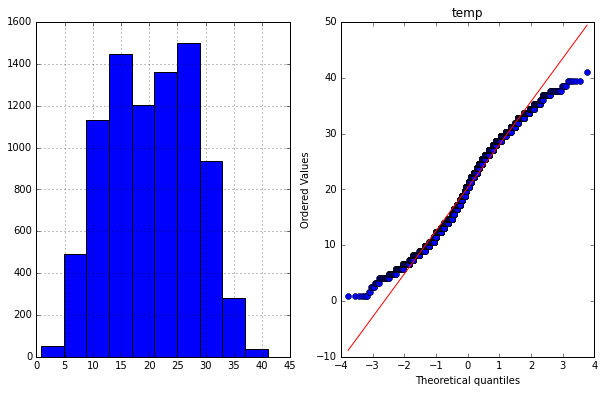

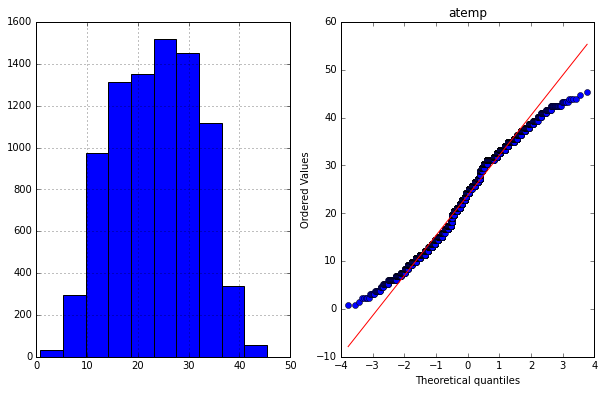

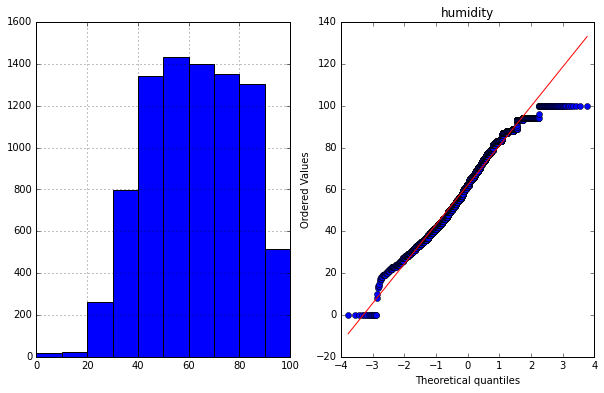

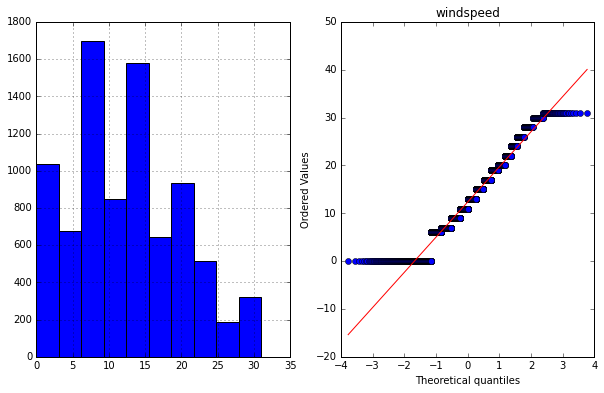

In [22]:

def diagnostics_plots(df,variable1):
  plt.figure(figsize=(10,6))
  
  plt.subplot(1,2,1)
  df[variable1].hist()

  plt.subplot(1,2,2)
  stats.probplot(df[variable1],dist='norm',plot=plt)
  plt.title(variable1)
df_train_copy_new=new_train_dropped
diagnostics_plots(df_train_copy_new,'temp')
diagnostics_plots(df_train_copy_new,'atemp')
diagnostics_plots(df_train_copy_new,'humidity')
diagnostics_plots(df_train_copy_new,'windspeed')

**ONLY THE WINDSPEED IS NOT NORMALY DISTRIBUTED IT IS MODERATELY RIGHT-SKEWED WE CAN TRASFROM IT TO GUASSIAN DISTRIBUTED**

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed

If the skewness is less than -1 or greater than 1, the data are highly skewed


In [23]:
print('temp skeweness',df_train_copy_new['temp'].skew())
print('atemp skeweness',df_train_copy_new['atemp'].skew())
print('humidity skeweness',df_train_copy_new['humidity'].skew())
print('windspeed skeweness',df_train_copy_new['windspeed'].skew())

temp skeweness -0.005436107536551362
atemp skeweness -0.10663826266433894
humidity skeweness -0.08338786942131209
windspeed skeweness 0.230172111215573


*change all the holiday==0 & workingday ==1 or holiday==1 & workingday==0  to workingday=1*

**TRAIN DATA**

In [24]:
condtn=df_train_copy_new[ ( (df_train_copy_new['holiday']==1) & (df_train_copy_new['workingday']==0) ) | ( (df_train_copy_new['holiday']==0) & (df_train_copy_new['workingday']==1) ) ]
condtn.shape

(5983, 13)

In [25]:
error=df_train_copy_new[ ( (df_train['holiday']==0) & (df_train_copy_new['workingday']==0) ) | ( (df_train_copy_new['holiday']==1) & (df_train_copy_new['workingday']==1) )] 
error['workingday']=1
corrected_error=error
corrected_error.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(2462, 13)

In [26]:
new_df_train=pd.concat([condtn,corrected_error],axis=0)
new_df_train.shape


(8445, 13)

**TEST DATA**

In [27]:
condtn1=df_test_copy_dropped[ ( (df_test_copy_dropped['holiday']==1) & (df_test_copy_dropped['workingday']==0) ) | ( (df_test_copy_dropped['holiday']==0) & (df_test_copy_dropped['workingday']==1) ) ]
condtn1.shape
error1=df_test_copy_dropped[ ( (df_test_copy_dropped['holiday']==0) & (df_test_copy_dropped['workingday']==0) ) | ( (df_test_copy_dropped['holiday']==1) & (df_test_copy_dropped['workingday']==1) )] 
error1['workingday']=1
corrected_error1=error1
corrected_error1.shape
df_test_copy_dropped=pd.concat([condtn1,corrected_error1],axis=0)
df_test_copy_dropped.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(2107, 13)

In [28]:
tab=pd.crosstab(new_df_train['time'],new_df_train['Total_booking'])
tab['100']=tab.iloc[:,1:101].sum(axis=1)
tab['200']=tab.iloc[:,101:201].sum(axis=1)
tab['300']=tab.iloc[:,201:301].sum(axis=1)
tab['400']=tab.iloc[:,301:401].sum(axis=1)
tab['500']=tab.iloc[:,401:501].sum(axis=1)
tab['600']=tab.iloc[:,501:601].sum(axis=1)
tab['700']=tab.iloc[:,701:801].sum(axis=1)
tab['800']=tab.iloc[:,801:988].sum(axis=1)
data={'1-100 BookingSum':tab['100'],'100-200 BookingSum':tab['200'],'200-300 BookingSum':tab['300'],'300-400 BookingSum':tab['400'],'400-500 BookingSum':tab['500'],'500-600 BookingSum':tab['600'],'600-700 BookingSum':tab['700'],'700-800 BookingSum':tab['800']}
tabular=pd.DataFrame(data)

tabular.head()

,1-100 BookingSum,100-200 BookingSum,200-300 BookingSum,300-400 BookingSum,400-500 BookingSum,500-600 BookingSum,600-700 BookingSum,700-800 BookingSum
time,,,,,,,,
0:00,140,70,57,37,22,9,337,0.0
10:00,143,70,70,35,22,18,364,0.0
11:00,114,77,57,40,22,20,339,0.0
12:00,131,79,45,32,30,18,342,0.0
13:00,139,86,59,36,18,13,358,0.0


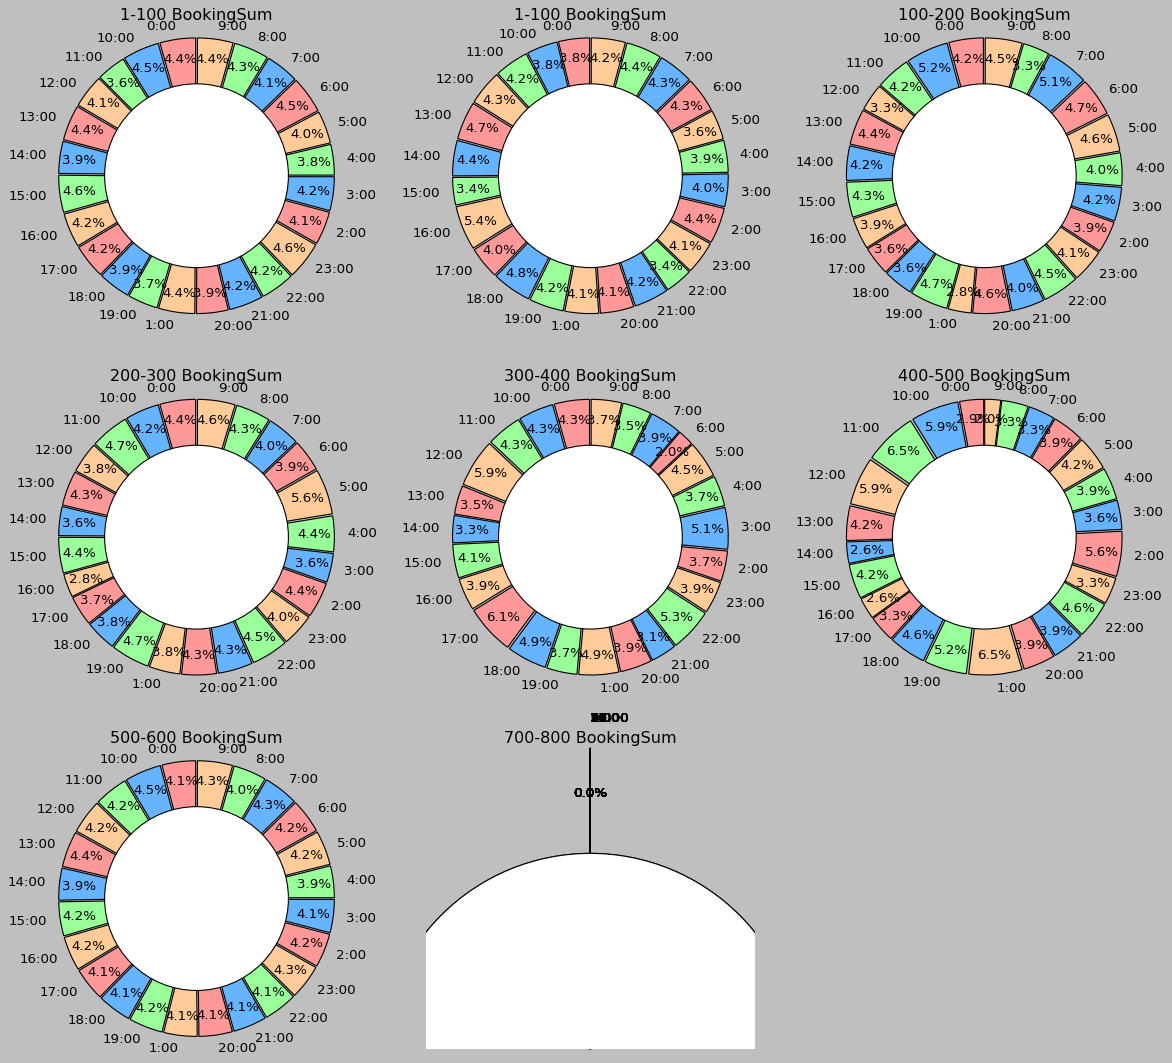

In [29]:
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
c=['#ff9999','#66b3ff','#99ff99','#ffcc99']
def pie_plot(df):
  plt.style.use('classic')
  fig = plt.figure(figsize=(18,16))
  plt.subplot(331)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('1-100 BookingSum')
  plt.pie(tabular['1-100 BookingSum'],labels=tabular.index,colors=c ,autopct='%1.1f%%',startangle=90, pctdistance=0.85,explode=explode)
  plt.subplot(332)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('1-100 BookingSum')
  plt.pie(tabular['100-200 BookingSum'],labels=tabular.index,colors=c ,autopct='%1.1f%%' ,startangle=90, pctdistance=0.85,explode=explode)
  plt.subplot(333)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('100-200 BookingSum')
  plt.pie(tabular['200-300 BookingSum'],labels=tabular.index,colors=c ,autopct='%1.1f%%' ,startangle=90, pctdistance=0.85,explode=explode)
  plt.subplot(334)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('200-300 BookingSum')
  plt.pie(tabular['300-400 BookingSum'],labels=tabular.index,colors=c ,autopct='%1.1f%%' ,startangle=90, pctdistance=0.85,explode=explode)
  plt.subplot(335)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('300-400 BookingSum')
  plt.pie(tabular['400-500 BookingSum'],labels=tabular.index,colors=c ,autopct='%1.1f%%' ,startangle=90, pctdistance=0.85,explode=explode)
  plt.subplot(336)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('400-500 BookingSum')
  plt.pie(tabular['500-600 BookingSum'],labels=tabular.index,colors=c ,autopct='%1.1f%%' ,startangle=90, pctdistance=0.85,explode=explode) 
  plt.subplot(337)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('500-600 BookingSum')
  plt.pie(tabular['600-700 BookingSum'],labels=tabular.index,colors=c ,autopct='%1.1f%%' ,startangle=90, pctdistance=0.85,explode=explode) 
  plt.subplot(338)
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('600-700 BookingSum')
  plt.pie(tabular['700-800 BookingSum'],labels=tabular.index,colors=c ,autopct='%1.1f%%' ,startangle=90, pctdistance=0.85,explode=explode) 
  centre_circle = plt.Circle((0,0),0.70,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.axis('equal') 
  plt.title('700-800 BookingSum')
pie_plot(tabular)

**CORRELATION ANANLYIS**

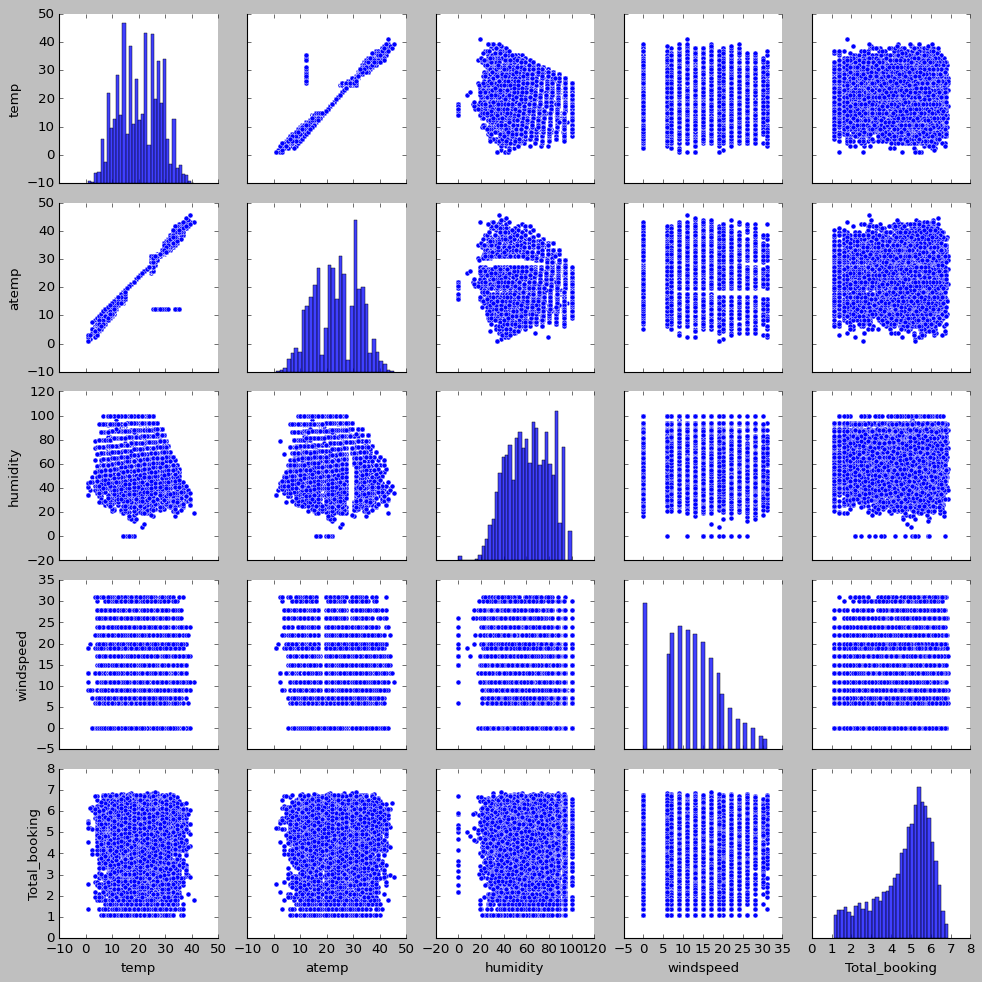

In [30]:
sns.pairplot(new_df_train[['temp','atemp','humidity','time','windspeed','Total_booking']])

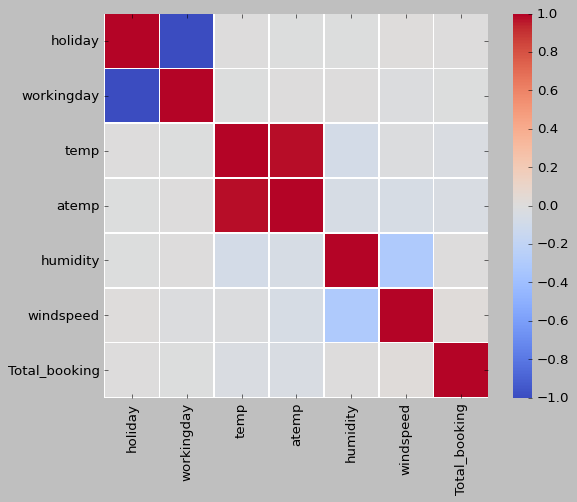

In [31]:
df_corr=new_df_train.corr()
sns.heatmap(df_corr,square = True, linewidths = .5,cmap = 'coolwarm')

**CORRELATION ANALYSIS**



*NULL HYPOTHESIS: variable1 and variable2 are independent*

*ALTERNATE HYPOTHESIS: variable1 and variable2 are dependent*

*Quantative-Quantative variable*

In [32]:
from scipy import stats

_,p=stats.pearsonr(new_df_train['temp'],new_df_train['atemp'])

print('spearman co-realtion for temp and atemp :{} , p-value for temp and square_root atemp : {}'.format(_,p))
if p <0.05:
  print('temp & atemp are  dependent')
else:
  print('temp & atemp are independent')

spearman co-realtion for temp and atemp :0.9840472816680436 , p-value for temp and square_root atemp : 0.0
temp & atemp are  dependent


*Qualitative-Qualitative variable*

In [33]:
group=new_df_train.groupby(['weather','season'])['season'].count()
data=[group.values[0:4],group.values[5:9],group.values[9:13]]
chisq,p = stats.chisquare(data) 
print('chisquare value :{} ,p-value: {}'.format(chisq,p))
if p[1] < 0.05:
  print('weather & season are independent')
else:
  print('weather & season are dependent')
f=new_df_train.groupby(['days','month'])['month'].count()
data1=[f.get('Friday').values,f.get('Wednesday').values,f.get('Saturday').values,f.get('Tuesday').values,f.get('Monday').values,f.get('Thursday').values,f.get('Sunday').values]
chisq,p = stats.chisquare(data1,ddof=23) 
print("")
print('chisquare value :{} ,p-value: {}'.format(chisq,p))
if p[1] < 0.05:
  print('days & month are not dependent')
else:
  print('days & month are dependent')

chisquare value :[1430.76844548 1008.90069513 1134.0252809   951.2173913 ] ,p-value: [2.05390156e-311 8.31759285e-220 5.61744829e-247 2.79105203e-207]
weather & season are independent

chisquare value :[ 5.05882353  7.46518106  9.36959554 13.77083333 10.6737481   5.39695712
  7.41666667  3.02339181  4.23922114  7.10526316  5.02       11.60784314] ,p-value: [nan nan nan nan nan nan nan nan nan nan nan nan]
days & month are dependent


Qualitative-Quantative variable

 **H1 : ALL the  mean value of variable1 are equal**

***H2  :ALL the  mean value of variable2 are equal***

 ***H3  : The interaction effect does not exist***

In [34]:
new_df_train[['season','weather','temp','atemp','humidity','windspeed','time','days','month','Total_booking']].head()

,season,weather,temp,atemp,humidity,windspeed,time,days,month,Total_booking
0,Summer,Clear + Few clouds,22.14,25.760,77,16.9979,19:00,Wednesday,May,1.791759
1,Fall,Clear + Few clouds,28.70,33.335,79,19.0012,4:00,Wednesday,September,4.941642
2,Spring,Clear + Few clouds,5.74,6.060,50,22.0028,9:00,Thursday,January,5.347108
3,Winter,Clear + Few clouds,13.94,16.665,29,8.9981,16:00,Friday,November,5.220356
4,Fall,Clear + Few clouds,30.34,33.335,51,19.0012,13:00,Tuesday,September,6.674561


In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
data=new_df_train[['days','month','season','weather','Total_booking']]
model=ols(formula='Total_booking ~ season+weather',data=data)
res=model.fit()
annona_test=sm.stats.anova_lm(res,typ=3)
print(annona_test)
alpha=0.05
hypothesis_rejected=[]
hypothesis_not_rejected=[]
for i in annona_test.itertuples():
  if i[4]<alpha:
    hypothesis_rejected.append(i[0])
  elif  np.isnan(i[4]):
    pass
  else:
    hypothesis_not_rejected.append(i[0])
print('')
print('all the mean of {} are not equal'.format(hypothesis_rejected))
print('all the mean of {} are equal'.format(hypothesis_not_rejected))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 sum_sq      df             F    PR(>F)
Intercept  41631.930202     1.0  22248.641034  0.000000
season        13.956988     3.0      2.486265  0.058701
weather        0.843665     3.0      0.150288  0.929542
Residual   15789.289175  8438.0           NaN       NaN

all the mean of ['Intercept'] are not equal
all the mean of ['season', 'weather'] are equal


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
data=new_df_train[['days','month','season','weather','Total_booking']]
model=ols(formula='Total_booking ~ days+month',data=data)
res=model.fit()
annona_test=sm.stats.anova_lm(res,typ=3)
print(annona_test)
alpha=0.05
hypothesis_rejected=[]
hypothesis_not_rejected=[]
for i in annona_test.itertuples():
  if i[4]<alpha:
    hypothesis_rejected.append(i[0])
  elif  np.isnan(i[4]):
    pass
  else:
    hypothesis_not_rejected.append(i[0])
print('')
print('all the mean of {} are not equal'.format(hypothesis_rejected))
print('all the mean of {} are equal'.format(hypothesis_not_rejected))

                 sum_sq      df            F    PR(>F)
Intercept  10484.866268     1.0  5606.761863  0.000000
days          13.663007     6.0     1.217711  0.293574
month         31.258238    11.0     1.519571  0.116826
Residual   15758.823042  8427.0          NaN       NaN

all the mean of ['Intercept'] are not equal
all the mean of ['days', 'month'] are equal


In [37]:
new_df_train=new_df_train.drop(labels=['date'],axis=1)

**FEATURE ENGINEERING**

**TRAIN DATA**

In [38]:
new_df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,time,days,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,1.791759,19:00,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,4.941642,4:00,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,5.347108,9:00,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,5.220356,16:00,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,6.674561,13:00,Tuesday,September


In [39]:
dummies=pd.get_dummies(new_df_train,columns=['season','weather','days','month','holiday','workingday'],drop_first=True)
dummies.head()

,temp,atemp,humidity,windspeed,Total_booking,time,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_1,workingday_1
0,22.14,25.760,77,16.9979,1.791759,19:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,28.70,33.335,79,19.0012,4.941642,4:00,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,5.74,6.060,50,22.0028,5.347108,9:00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,13.94,16.665,29,8.9981,5.220356,16:00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,30.34,33.335,51,19.0012,6.674561,13:00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [40]:
time_frequency=dummies['time'].value_counts(normalize=True)
dummies['time_frequency']=dummies['time'].apply(lambda x :time_frequency[x])
dummies=dummies.drop(columns=['time'],axis=1)

In [41]:
std_scalar=StandardScaler().fit(dummies[['temp','atemp','humidity','windspeed','time_frequency','Total_booking']])
dummies_scaled=std_scalar.transform(dummies[['temp','atemp','humidity','windspeed','time_frequency','Total_booking']])
dummies[['temp','atemp','humidity','windspeed','time_frequency','Total_booking']]=dummies_scaled


In [42]:
new_train_scaled=dummies
new_train_scaled.tail()

,temp,atemp,humidity,windspeed,Total_booking,season_Spring,season_Summer,season_Winter,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_1,workingday_1,time_frequency
8683,-0.604653,-0.477207,0.735297,-0.180649,0.093338,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.084793
8686,-0.919759,-1.103418,-1.632684,1.825465,-1.873969,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.587373
8688,-1.549971,-1.730219,-0.948600,1.290561,0.719761,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1.391500
8690,-1.444936,-1.193214,-0.369761,-1.651858,-0.353891,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.116239
8700,-0.709688,-0.656209,0.472188,-0.715553,-0.388986,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.290984


**TEST DATA**

In [43]:
df_test_copy_dropped.season.value_counts()
df_test_copy_dropped['Total_booking']=df_test_copy_dropped['Total_booking'].fillna(df_test_copy_dropped['Total_booking'].mean(),axis=0)
df_test_copy_dropped['Total_booking'].isnull().sum()
dummies1=pd.get_dummies(df_test_copy_dropped,columns=['season','weather','days','month','holiday','workingday'],drop_first=True)

time_frequency1=dummies1['time'].value_counts(normalize=True)
dummies1['time_frequency']=dummies1['time'].apply(lambda x :time_frequency1[x])
dummies1=dummies1.drop(columns=['time'],axis=1)

std_scalar=StandardScaler().fit(dummies1[['temp','atemp','humidity','windspeed','time_frequency','Total_booking']])
dummies_scaled1=std_scalar.transform(dummies1[['temp','atemp','humidity','windspeed','time_frequency','Total_booking']])
dummies1[['temp','atemp','humidity','windspeed','time_frequency','Total_booking']]=dummies_scaled1
dummies_scaled1

df_test_copy_dropped_scaled=dummies1
df_test_copy_dropped_scaled.head()

,temp,atemp,humidity,windspeed,Total_booking,date,season_Spring,season_Summer,season_Winter,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy,days_Monday,days_Saturday,days_Sunday,days_Thursday,days_Tuesday,days_Wednesday,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,holiday_1,workingday_1,time_frequency
3,0.675608,0.609741,1.036036,-1.672728,1.388884,10/13/2011,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.123921
5,-1.028041,-0.934232,-0.110460,-0.843840,0.639941,4/1/2011,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.720725
7,-0.495651,-0.389406,-0.683707,-0.153717,1.207695,11/1/2012,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,-0.298402
8,-0.176217,-0.117292,-1.152728,1.640973,-2.027168,10/12/2012,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.826306
9,-0.708607,-0.752623,0.410675,0.121962,-1.316403,3/18/2011,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,-1.354210


**FEATURE SELECTIONS**

Text(0.5, 0, ' F-score ')

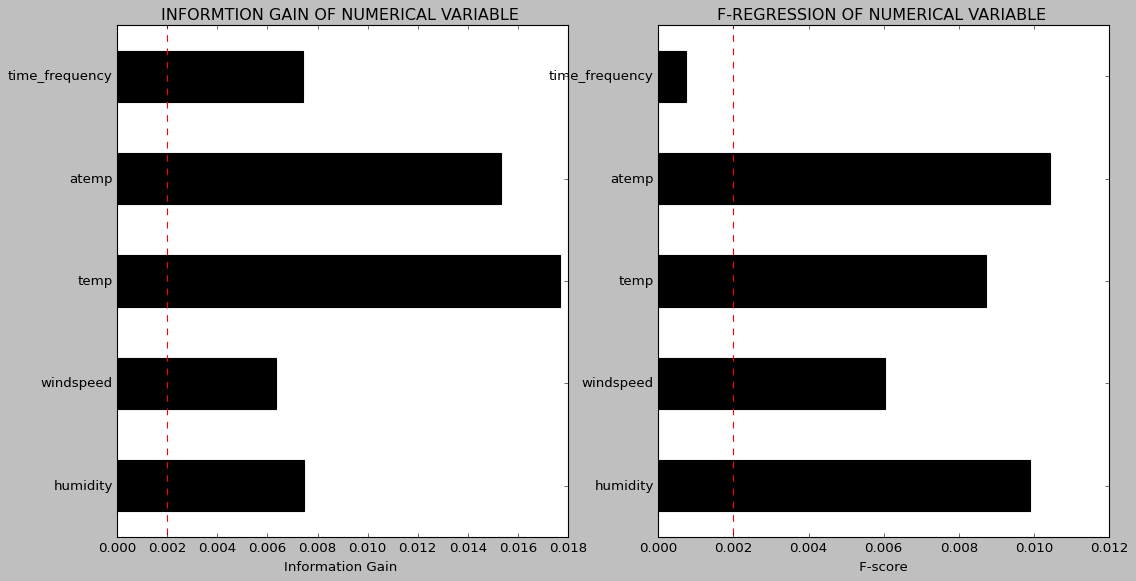

In [44]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
new_train_scaled['Total_booking']=new_train_scaled['Total_booking'].fillna(new_train_scaled['Total_booking'].mean(),axis=0)
y=np.reshape(np.array(new_train_scaled['Total_booking']),(-1,1)).ravel()
x=new_train_scaled[['humidity','windspeed','temp','atemp','time_frequency']]
X=np.array(x)

plt.figure(figsize=(16,8))
info_gain=mutual_info_regression(X,y)
info_gain_frame_num=pd.Series(info_gain,x.columns[0:len(x.columns)])

f_reg=mutual_info_regression(X,y)
f_reg_frame_num=pd.Series(f_reg,x.columns[0:len(x.columns)])

plt.subplot(121)
plt.xlabel('Information Gain ')
info_gain_frame_num.plot(kind='barh',colormap='nipy_spectral')
plt.vlines(x=0.002,ymin=-1,ymax=6,colors='red',linestyles ='--')
plt.title('INFORMTION GAIN OF NUMERICAL VARIABLE ')

plt.subplot(122)
f_reg_frame_num.plot(kind='barh',colormap='nipy_spectral')
plt.vlines(x=0.002,ymin=-1,ymax=6,colors='red',linestyles ='--')
plt.title('F-REGRESSION OF NUMERICAL VARIABLE ')
plt.xlabel(' F-score ')


Text(0.5, 0, ' F-score ')

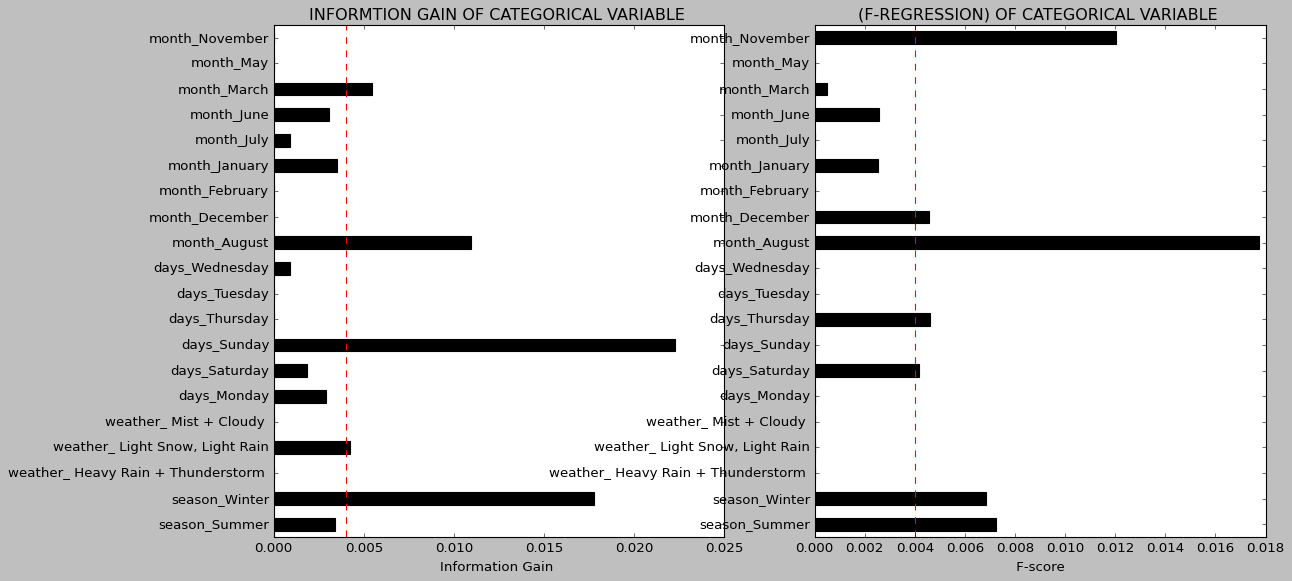

In [45]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
X=new_train_scaled.iloc[:,6:-5]
y=np.reshape(np.array(new_train_scaled['Total_booking']),(-1,1)).ravel()
x=new_train_scaled.iloc[:,6:-5]

plt.figure(figsize=(16,8))
info_gain=mutual_info_regression(X,y)
info_gain_frame_cat=pd.Series(info_gain,x.columns[0:len(x.columns)])

f_reg=mutual_info_regression(X,y)
f_reg_frame_cat=pd.Series(f_reg,x.columns[0:len(x.columns)])

plt.subplot(121)
plt.xlabel('Information Gain ')
info_gain_frame_cat.plot(kind='barh',colormap='nipy_spectral')
plt.vlines(x=0.004,ymin=-1,ymax=len(x.columns),colors='red',linestyles ='--')
plt.title('INFORMTION GAIN OF CATEGORICAL VARIABLE ')

plt.subplot(122)
f_reg_frame_cat.plot(kind='barh',colormap='nipy_spectral')
plt.vlines(x=0.004,ymin=-1,ymax=len(x.columns),colors='red',linestyles ='--')
plt.title('(F-REGRESSION) OF CATEGORICAL VARIABLE ')
plt.xlabel(' F-score ')


**SPLITTING THE DATA INTO TRAIN AND TEST SPLIT**

In [46]:
X_train_f_reg,y_train_f_reg=new_train_scaled[['humidity', 'atemp', 'time_frequency','days_Saturday','days_Wednesday','month_December']],new_train_scaled['Total_booking']
X_test_f_reg,y_test_f_reg=df_test_copy_dropped_scaled[['humidity', 'atemp', 'time_frequency','days_Saturday','days_Wednesday','month_December']],df_test_copy_dropped_scaled['Total_booking']
print(X_train_f_reg.shape,y_train_f_reg.shape)
print(X_test_f_reg.shape,y_test_f_reg.shape)



(8445, 6) (8445,)
(2107, 6) (2107,)


In [47]:
new_train_scaled['Total_booking'].isnull().sum()

0

In [48]:
X_train_infogain,y_train_infogain=new_train_scaled[['humidity', 'atemp', 'weather_ Mist + Cloudy ', 'days_Monday', 'days_Saturday', 'month_May']],new_train_scaled['Total_booking']
X_test_infogain,y_test_infogain=df_test_copy_dropped_scaled[['humidity','atemp','weather_ Mist + Cloudy ', 'days_Monday', 'days_Saturday', 'month_May']],df_test_copy_dropped_scaled['Total_booking']
print(X_train_infogain.shape,y_train_infogain.shape)
print(X_test_infogain.shape,y_test_infogain.shape)

(8445, 6) (8445,)
(2107, 6) (2107,)


In [49]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.0)


MSE:0.9993062595299298, MAE:0.8121874372644267, MAPE:1.0711923501931975
MSE:1.000496002498765, MAE:0.8144317237588579, MAPE:1.0515235204849014


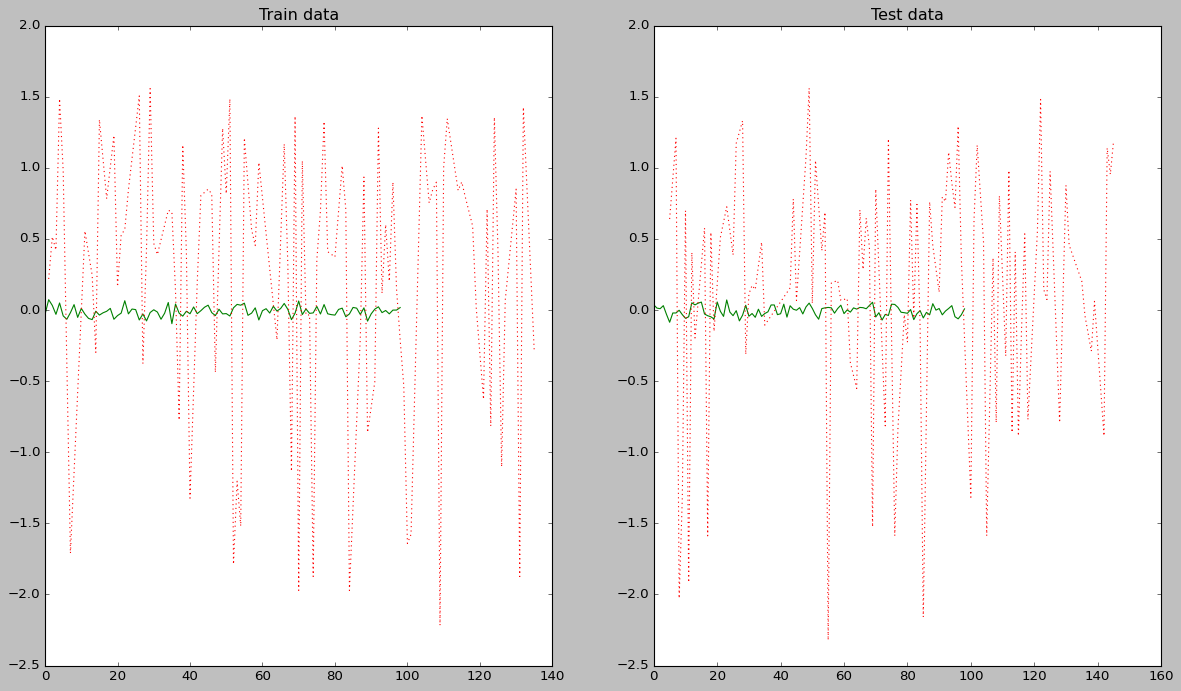

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
lr=LinearRegression().fit(X_train_f_reg, y_train_infogain)
y_pred_train = lr.predict(X_train_infogain)
y_pred_test = lr.predict(X_test_infogain)

print('MSE:{}, MAE:{}, MAPE:{}'.format(mean_squared_error(y_train_infogain,y_pred_train),mean_absolute_error(y_train_infogain,y_pred_train),mean_absolute_percentage_error(y_train_infogain,y_pred_train)))
print('MSE:{}, MAE:{}, MAPE:{}'.format(mean_squared_error(y_test_infogain,y_pred_test),mean_absolute_error(y_test_infogain,y_pred_test),mean_absolute_percentage_error(y_test_infogain,y_pred_test)))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121)

ax.plot(y_pred_train[1:100],label='predict',color='green')
ax.plot(y_train_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax.set_title('Train data')


ax2 = fig.add_subplot(122)

ax2.plot(y_pred_test[1:100],label='predict',color='green')
ax2.plot(y_test_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax2.set_title('Test data')

plt.show()

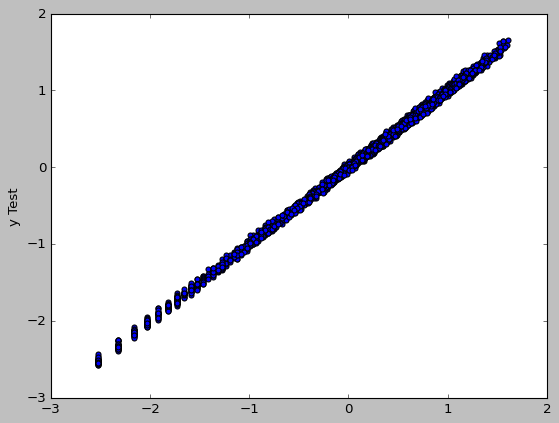

In [51]:
residual=y_test_infogain-y_pred_test
plt.scatter(y_test_infogain,residual)
plt.ylabel('residuls')
plt.ylabel('y Test')
plt.show()

train MSE:1.0703919512800935, MAE:0.7816447811780485, MAPE:1.9233288388600456
test MSE:1.072219115707427, MAE:0.7880529184583303, MAPE:1.7103993289710535


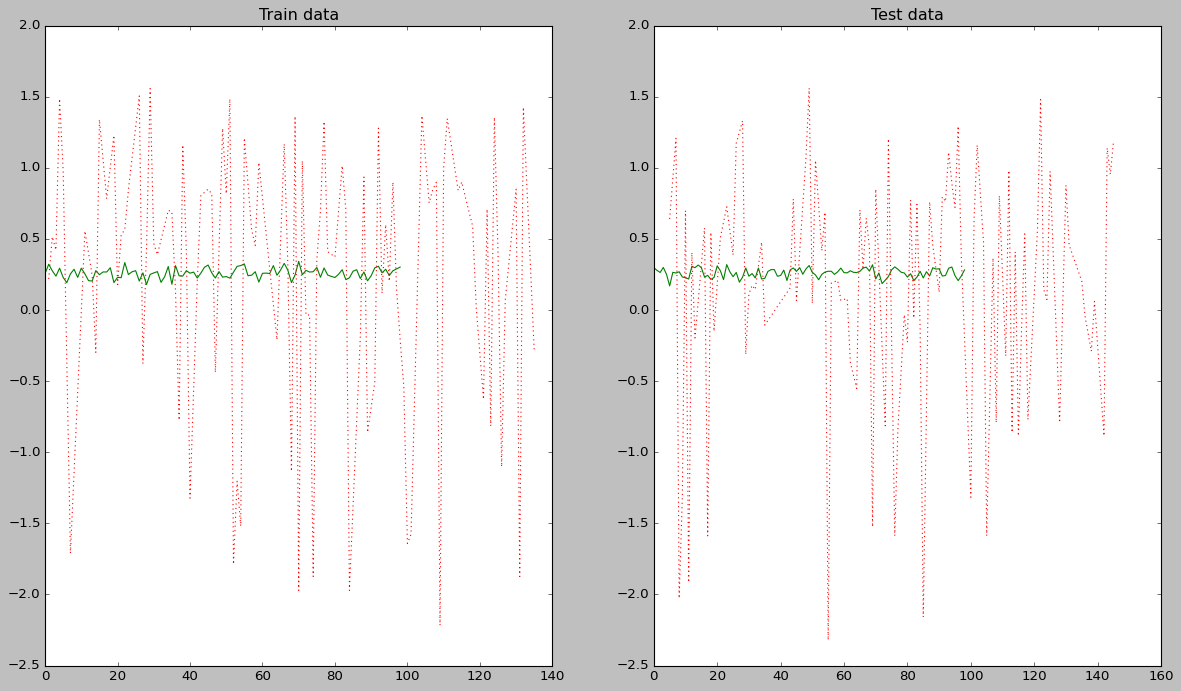

In [52]:
from sklearn.svm import SVR
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import GridSearchCV

svr = SVR().fit(X_train_infogain, y_train_infogain)
param={'kernel':('poly','linear'),'degree':(1,2,3,4,5)}
clf1= GridSearchCV(svr,param)
clf1.fit(X_train_f_reg, y_train_infogain)

y_pred_train = clf1.predict(X_train_infogain)
y_pred_test = clf1.predict(X_test_infogain)

print('train MSE:{}, MAE:{}, MAPE:{}'.format(mean_squared_error(y_train_infogain,y_pred_train),mean_absolute_error(y_train_infogain,y_pred_train),mean_absolute_percentage_error(y_train_infogain,y_pred_train)))
print('test MSE:{}, MAE:{}, MAPE:{}'.format(mean_squared_error(y_test_infogain,y_pred_test),mean_absolute_error(y_test_infogain,y_pred_test),mean_absolute_percentage_error(y_test_infogain,y_pred_test)))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121)

ax.plot(y_pred_train[1:100],label='predict',color='green')
ax.plot(y_train_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax.set_title('Train data')


ax2 = fig.add_subplot(122)

ax2.plot(y_pred_test[1:100],label='predict',color='green')
ax2.plot(y_test_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax2.set_title('Test data')

plt.show()

R squared:0.1293509803300198 ,train MSE:0.8706490196699802, MAE:0.7429181341844822, MAPE:2.1514159339802066
R squared:-0.1982492020204749 ,test MSE:1.198249202020475, MAE:0.8755564792281019, MAPE:2.3504831645976743


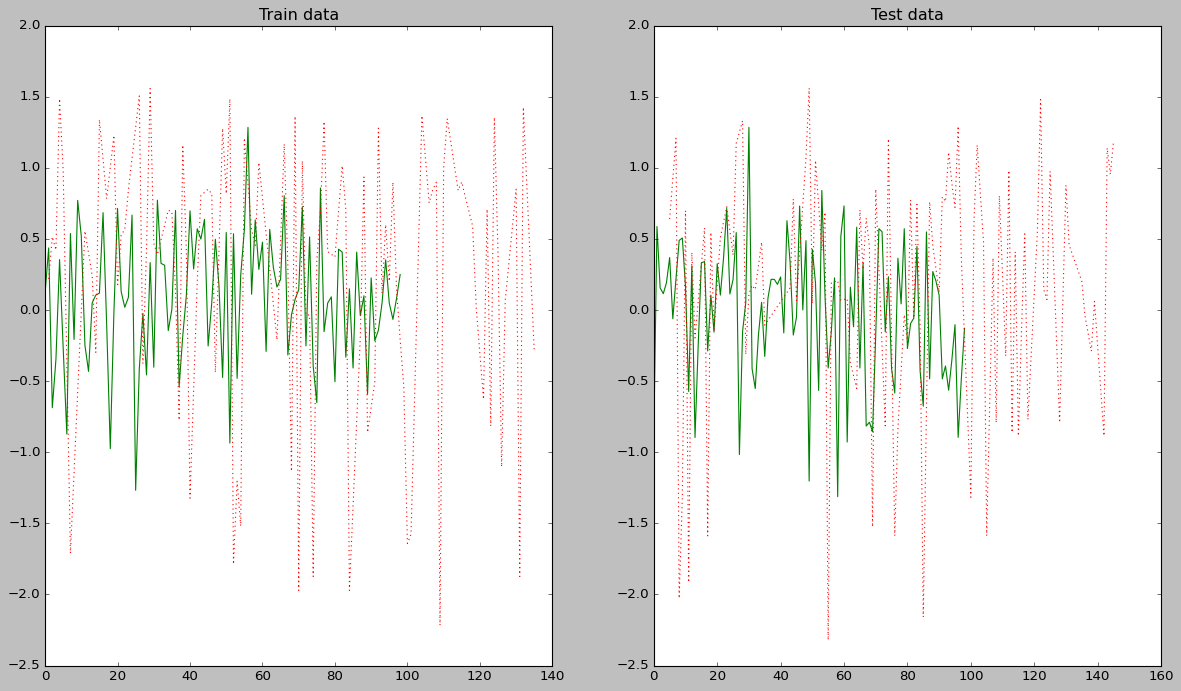

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  mean_squared_error

parameters={'n_neighbors':[1,100,200,500,1000,2000],'weights':('uniform','distance')}



neigh = KNeighborsRegressor().fit(X_train_infogain, y_train_infogain)

y_pred_train = neigh.predict(X_train_infogain)
y_pred_test = neigh.predict(X_test_infogain)

print('R squared:{} ,train MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_train_infogain,y_pred_train),mean_squared_error(y_train_infogain,y_pred_train),mean_absolute_error(y_train_infogain,y_pred_train),mean_absolute_percentage_error(y_train_infogain,y_pred_train)))
print('R squared:{} ,test MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_test_infogain,y_pred_test),mean_squared_error(y_test_infogain,y_pred_test),mean_absolute_error(y_test_infogain,y_pred_test),mean_absolute_percentage_error(y_test_infogain,y_pred_test)))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121)

ax.plot(y_pred_train[1:100],label='predict',color='green')
ax.plot(y_train_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax.set_title('Train data')


ax2 = fig.add_subplot(122)

ax2.plot(y_pred_test[1:100],label='predict',color='green')
ax2.plot(y_test_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax2.set_title('Test data')

plt.show()

R squared:0.3479703637107485 ,train MSE:0.6520296362892515, MAE:0.5871753801006946, MAPE:1.8738316239727857
R squared:-0.5651399742275742 ,test MSE:1.5651399742275742, MAE:0.9822660893776624, MAPE:2.6425651296917128


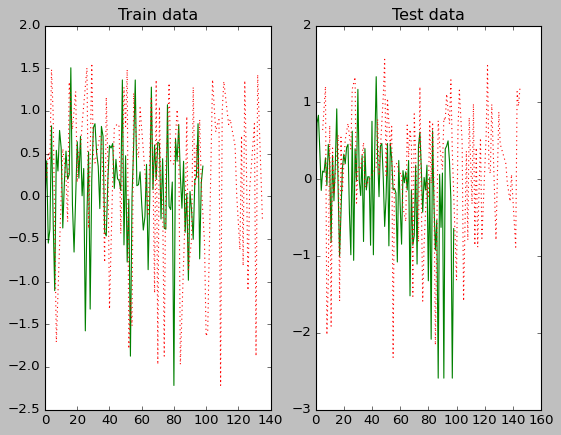

In [54]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.tree import DecisionTreeRegressor


dt=DecisionTreeRegressor(random_state = 42).fit(X_train_infogain, y_train_infogain)

y_pred_train = dt.predict(X_train_infogain)
y_pred_test = dt.predict(X_test_infogain)

print('R squared:{} ,train MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_train_infogain,y_pred_train),mean_squared_error(y_train_infogain,y_pred_train),mean_absolute_error(y_train_infogain,y_pred_train),mean_absolute_percentage_error(y_train_infogain,y_pred_train)))
print('R squared:{} ,test MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_test_infogain,y_pred_test),mean_squared_error(y_test_infogain,y_pred_test),mean_absolute_error(y_test_infogain,y_pred_test),mean_absolute_percentage_error(y_test_infogain,y_pred_test)))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121)

ax.plot(y_pred_train[1:100],label='predict',color='green')
ax.plot(y_train_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax.set_title('Train data')


ax2 = fig.add_subplot(122)

ax2.plot(y_pred_test[1:100],label='predict',color='green')
ax2.plot(y_test_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax2.set_title('Test data')

plt.show()


R squared:0.6831838358353832,MSE:0.3168161641646167, MAE:0.42181818535445, MAPE:1.3509316136633591
R squared:-0.18323381906853276,MSE:1.1832338190685328, MAE:0.8806762675312214, MAPE:2.13556165472768


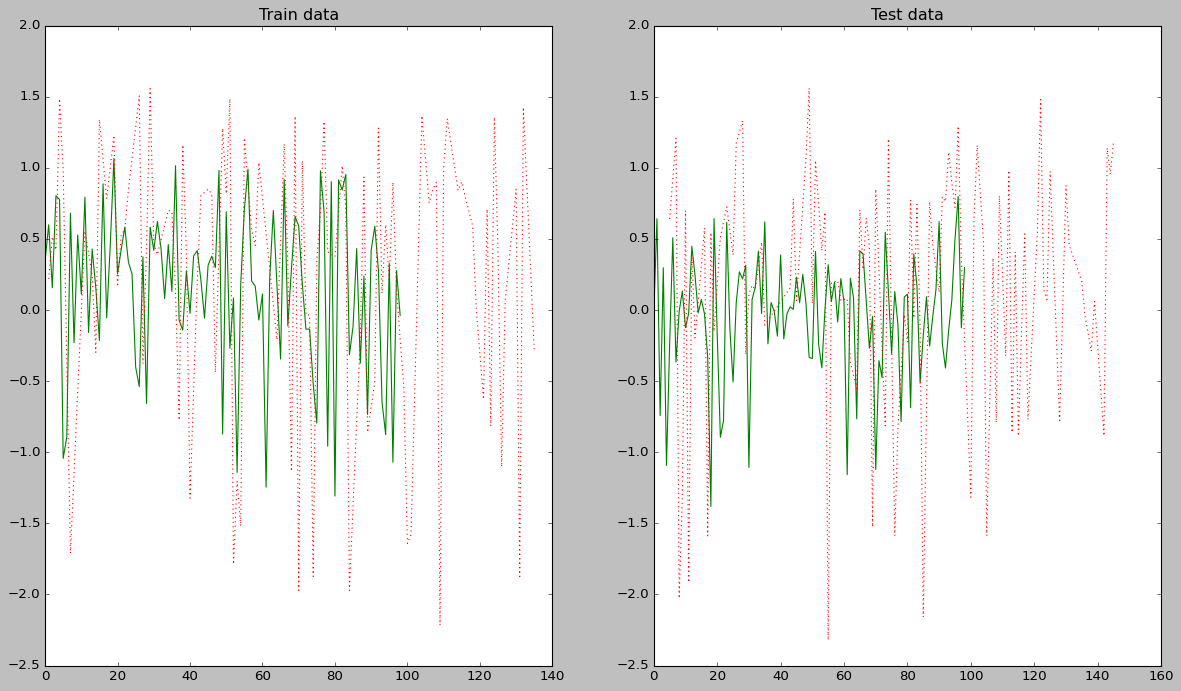

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rr=RandomForestRegressor(random_state = 42).fit(X_train_f_reg, y_train_f_reg)
y_pred_train = rr.predict(X_train_f_reg)
y_pred_test = rr.predict(X_test_f_reg)

print('R squared:{},MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_train_f_reg, y_pred_train),mean_squared_error(y_train_f_reg, y_pred_train),mean_absolute_error(y_train_f_reg, y_pred_train),mean_absolute_percentage_error(y_train_f_reg, y_pred_train)))
print('R squared:{},MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_test_f_reg,y_pred_test),mean_squared_error(y_test_f_reg,y_pred_test),mean_absolute_error(y_test_f_reg,y_pred_test),mean_absolute_percentage_error(y_test_f_reg,y_pred_test)))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121)

ax.plot(y_pred_train[1:100],label='predict',color='green')
ax.plot(y_train_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax.set_title('Train data')


ax2 = fig.add_subplot(122)

ax2.plot(y_pred_test[1:100],label='predict',color='green')
ax2.plot(y_test_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax2.set_title('Test data')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


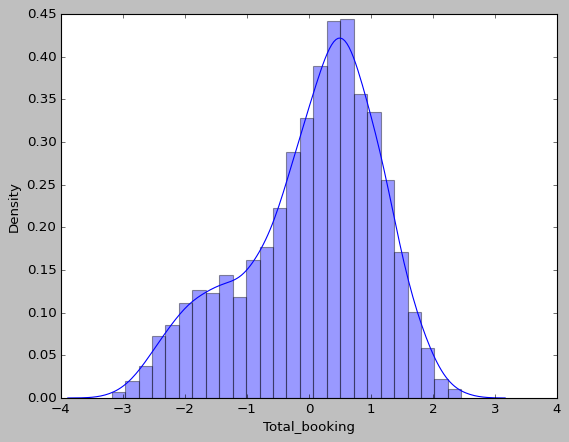

In [56]:
sns.distplot(y_test_infogain-y_pred_test)

R squared:0.5721294630288593,MSE:0.42787053697114075, MAE:0.5499335987419854, MAPE:1.7146069216221433
R squared:-0.15354755209060844,MSE:1.1535475520906084, MAE:0.8903877104950291, MAPE:2.011794099103632


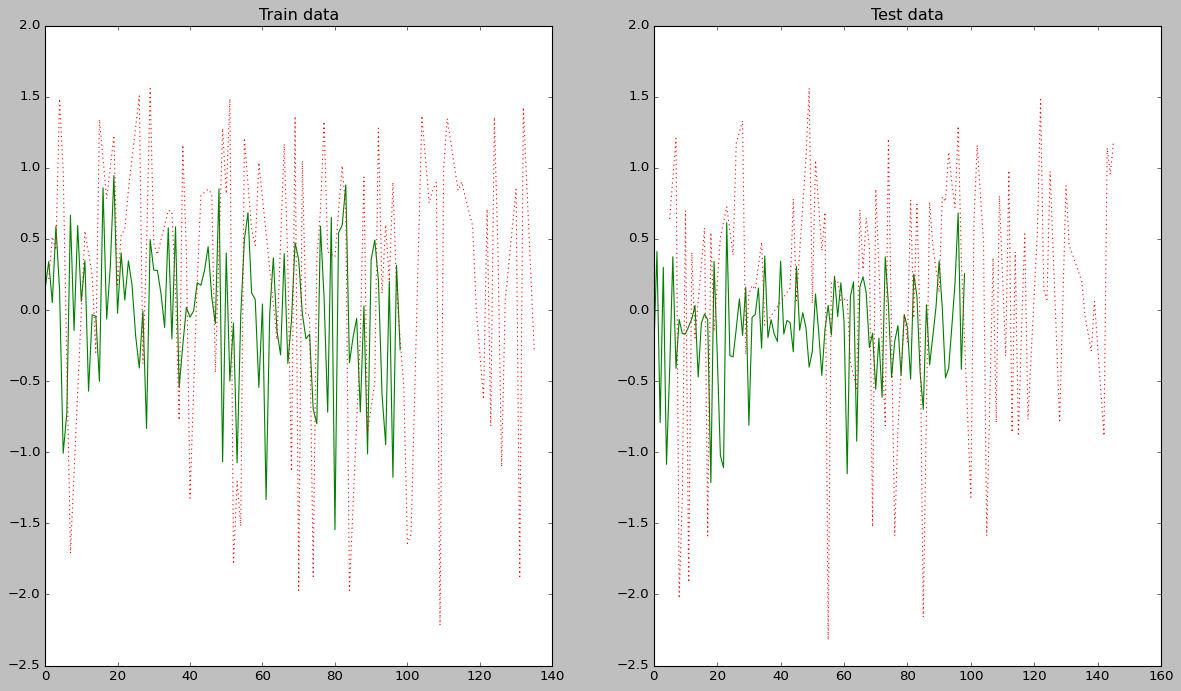

In [57]:
from sklearn.ensemble import AdaBoostRegressor



ada=AdaBoostRegressor(base_estimator=rr).fit(X_train_f_reg, y_train_f_reg)
y_pred_train = ada.predict(X_train_f_reg)
y_pred_test = ada.predict(X_test_f_reg)

print('R squared:{},MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_train_f_reg, y_pred_train),mean_squared_error(y_train_f_reg, y_pred_train),mean_absolute_error(y_train_f_reg, y_pred_train),mean_absolute_percentage_error(y_train_f_reg, y_pred_train)))
print('R squared:{},MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_test_f_reg,y_pred_test),mean_squared_error(y_test_f_reg,y_pred_test),mean_absolute_error(y_test_f_reg,y_pred_test),mean_absolute_percentage_error(y_test_f_reg,y_pred_test)))


fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121)

ax.plot(y_pred_train[1:100],label='predict',color='green')
ax.plot(y_train_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax.set_title('Train data')


ax2 = fig.add_subplot(122)

ax2.plot(y_pred_test[1:100],label='predict',color='green')
ax2.plot(y_test_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax2.set_title('Test data')

plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings
warnings.filterwarnings('ignore')

ada=AdaBoostRegressor(base_estimator=dt)
n_estimators=[int(x) for x in np.linspace(100,1000,10)]
learning_rate = [0.01,0.05,0.1,0.3,1]
random_grid={'n_estimators': n_estimators ,'loss' : ['linear', 'square', 'exponential'],'learning_rate' : [0.01,0.05,0.1,0.3,1]}
rscv = RandomizedSearchCV(estimator = ada, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42,n_jobs = -1)
rscv.fit(X_train_f_reg,y_train_f_reg)
rscv.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
from sklearn.model_selection import GridSearchCV
random_grid={'learning_rate': [0.1], 'loss': ['exponential'], 'n_estimators': [1000]}
grid_search = GridSearchCV(estimator = ada, param_grid = random_grid)
                           
grid_search.fit(X_train_f_reg,y_train_f_reg)
y_pred_train = grid_search.predict(X_train_f_reg)
y_pred_test = grid_search.predict(X_test_f_reg)

print('R squared:{},MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_train_f_reg,y_pred_train),mean_squared_error(y_train_f_reg,y_pred_train),mean_absolute_error(y_train_f_reg,y_pred_train),mean_absolute_percentage_error(y_train_f_reg,y_pred_train)))
print('R squared:{},MSE:{}, MAE:{}, MAPE:{}'.format(r2_score(y_test_f_reg,y_pred_test),mean_squared_error(y_test_f_reg,y_pred_test),mean_absolute_error(y_test_f_reg,y_pred_test),mean_absolute_percentage_error(y_test_f_reg,y_pred_test)))

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(121)

ax.plot(y_pred_train[1:100],label='predict',color='green')
ax.plot(y_train_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax.set_title('Train data')


ax2 = fig.add_subplot(122)

ax2.plot(y_pred_test[1:100],label='predict',color='green')
ax2.plot(y_test_f_reg[1:100],label='true',color='red',linestyle='dotted')
ax2.set_title('Test data')

plt.show()